In [47]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from perceptron import Perceptron
from adaline_gradient_descent import AdalineGD
from adaline_sgd import AdalineSGD
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [19]:
data_url = 'data/iris.data'

# Load the dataset
data_df = pd.read_csv(data_url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower_class'])

# Preview the data
data_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,flower_class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [20]:
# Get the class labels of the first 100 records
y = (
    data_df
    # Select the first 100 records which 
    # corresponds to the Iris-setosa and Iris-versicolor
    .iloc[0:100]
    # Change the class labels to 0 and 1 with1 being versicolor 
    # with the current state of the dataframe
    .assign(flower_class= lambda df_: np.where(df_['flower_class'] == 'Iris-versicolor', 1, 0))
    # Select the flower_class
    [['flower_class']]
    )

#  Get the feature vector
X = (
    data_df
    # Select the sepal_length and petal_length
    .iloc[0:100, [0,2]]
)

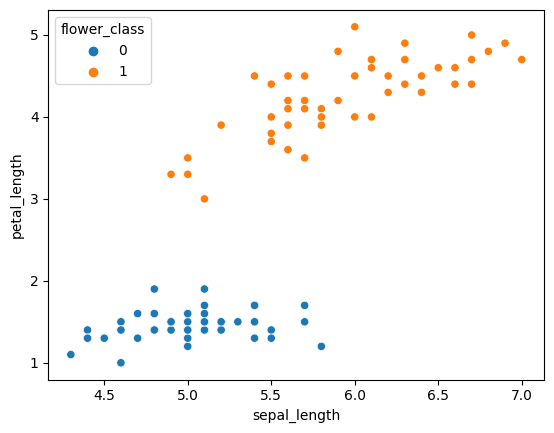

In [21]:
scatter_plot = sns.scatterplot(
            x=X['sepal_length'], y = X['petal_length'],
            hue=y['flower_class']
)


# Perceptron Algorithm

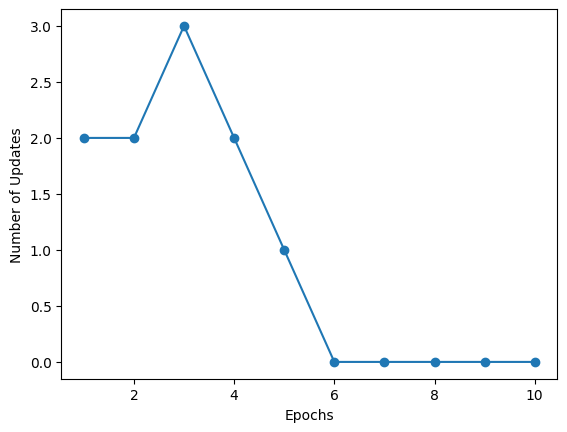

In [22]:
# Train the Perceptron Algorithm
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X.values,y.values)

plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o'
         )

plt.xlabel('Epochs')
plt.ylabel('Number of Updates')
plt.show()

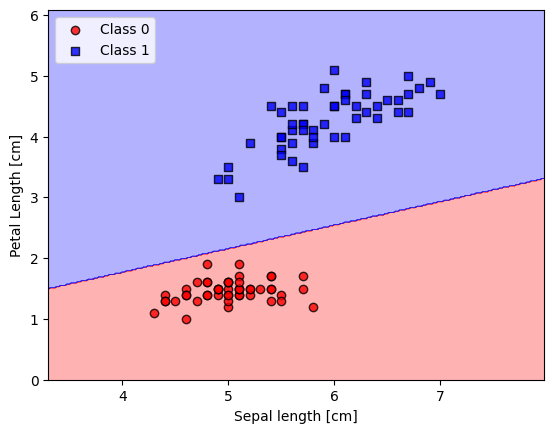

In [23]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y[: , 0] == cl, 0],
                y=X[y[: , 0] == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')
        

plot_decision_regions(X.values, y.values, classifier=ppn)

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.show()

# ADALINE Gradient Descent

> This often requires some experimentation to find a good learning rate, 𝜂𝜂 , for optimal convergence. So, let’s choose two different learning rates, 𝜂=0.1 and 𝜂=0.0001, to start with and plot the loss functions versus the number of epochs to see how well the Adaline implementation learns from the training data

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

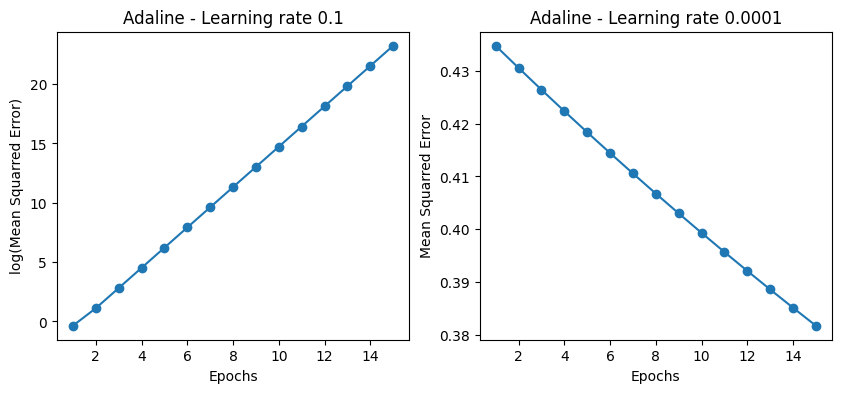

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ada_1 = AdalineGD(n_iter=15, eta=0.1).fit(X.values,y.values)

ax[0].plot(range(1, len(ada_1.losses_) + 1), np.log10(ada_1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean Squarred Error)')
ax[0].set_title('Adaline - Learning rate 0.1')


ada_2 = AdalineGD(n_iter=15, eta=0.0001).fit(X.values,y.values)

ax[1].plot(range(1, len(ada_2.losses_) + 1), ada_2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean Squarred Error')
ax[1].set_title('Adaline - Learning rate 0.0001')

> The left chart shows what could happen if we choose a learning rate `𝜂=0.1` that is too large. Instead of minimizing the loss function, the MSE becomes larger in every epoch, because we overshoot the global minimum.
On the other hand, we can see that the loss decreases on the right plot, but the chosen learning rate, `𝜂=0.0001` , is so small that the algorithm would require a very large number of epochs to converge to the global loss minimum:

## Improving Gradient Descent through Feature Scaling

Scale the features and retrain Adaline again.

In [37]:
# Get a copy of the X
X_std = np.copy(X.values)

# Standardize the sepal_length
X_std[:,0] = (X.values[:,0] - X.values[:,0].mean()) / X.values[:,0].std()

# Standardize the sepal_width
X_std[:,1] = (X.values[:,1] - X.values[:,1].mean()) / X.values[:,1].std()


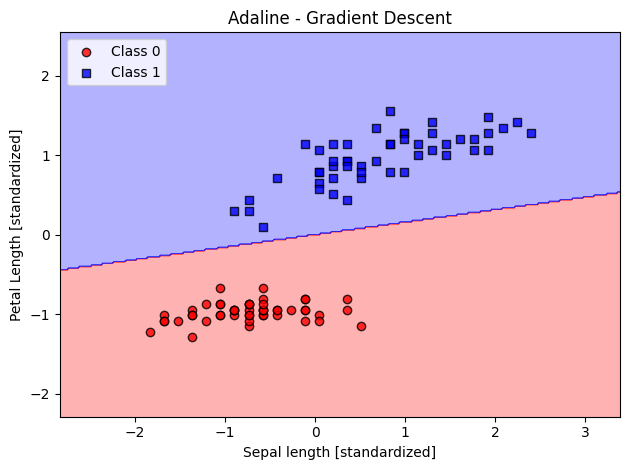

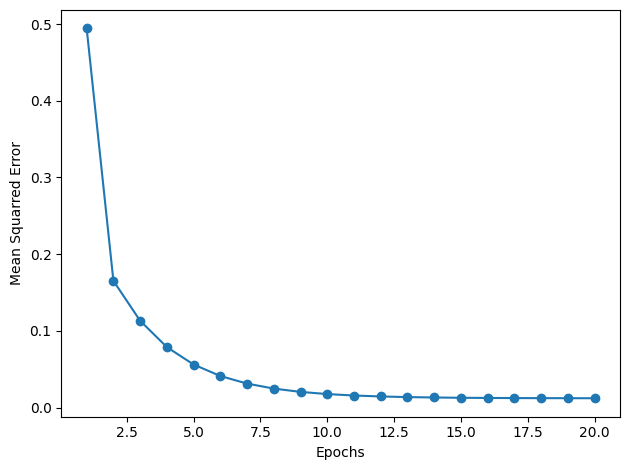

In [46]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)

ada_gd.fit(X_std, y.values)

plot_decision_regions(X_std, y.values, classifier=ada_gd)

plt.title('Adaline - Gradient Descent')

plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal Length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1),
        ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squarred Error')
plt.tight_layout()

> As we can see in the plots, Adaline has now converged after training on the standardized features.
However, note that the MSE remains non-zero even though all flower examples were classified correctly.

## Large-scale machine learning and stochastic gradient descent

Now imagine that we have a very large dataset with millions of data points, which is not uncommon in many machine learning applications. Running full batch gradient descent can be computationally quite costly in such scenarios, since we need to reevaluate the whole training dataset each time we take one step toward the global minimum. A popular alternative to the batch gradient descent algorithm is `stochastic gradient descent (SGD)`, which is sometimes also called iterative or online gradient descent. Here, we update the parameters incrementally for each training example.


> Another advantage of `SGD` is that we can use it for `online learning`. In online learning, our model is trained on the fly as new training data arrives. This is especially useful if we are accumulating large amounts of data, for example, customer data in web applications. Using online learning, the system can immediately adapt to changes, and the training data can be discarded after updating the model if storage space is an issue.

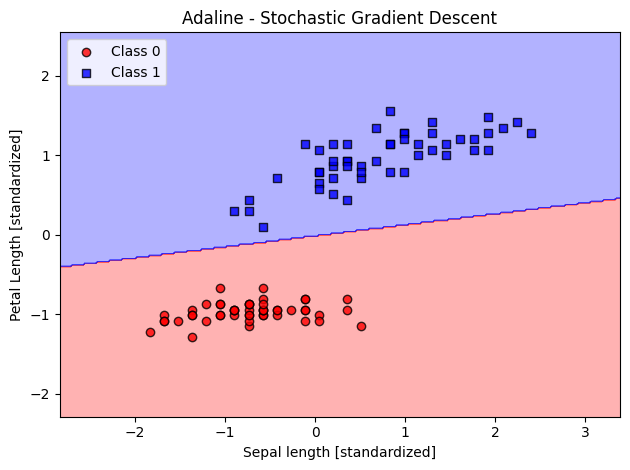

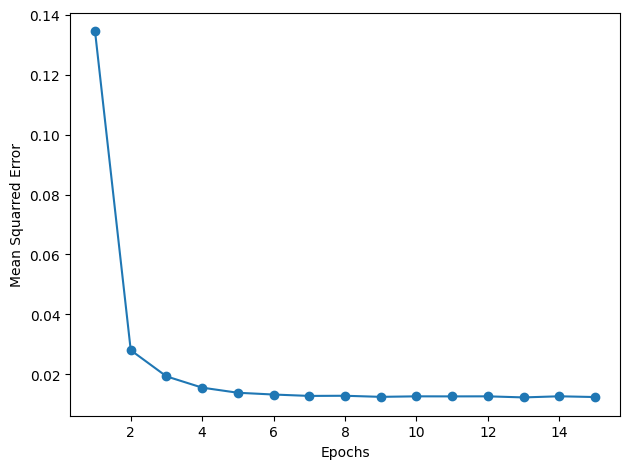

In [49]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)

ada_sgd.fit(X_std, y.values)
plot_decision_regions(X_std, y.values, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal Length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1),
        ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squarred Error')
plt.tight_layout()

> As you can see, the average loss goes down pretty quickly, and the final decision boundary after 15 epochs
looks similar to the batch gradient descent Adaline. If we want to update our model, for example,
in an online learning scenario with streaming data, we could simply call the partial_fit method on
individual training examples—for instance, ada_sgd.partial_fit(X_std[0, :], y[0])